In [1]:
#Many Thanks for https://www.youtube.com/watch?v=QIUxPv5PJOY&t=326s

In [2]:
#import packge
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
#Get the Stock quote
df = web.DataReader('VZ',data_source='yahoo',start='2010-01-01',end='2020-10-25')
#df = web.DataReader('VZ','stooq')
#show the data
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.372387,31.034746,31.325493,31.212946,16176600.0,18.520220
2010-01-05,31.325493,30.744001,31.297356,31.269218,23722900.0,18.553604
2010-01-06,30.706486,29.824871,30.612698,29.937416,37506400.0,18.037384


In [4]:
#show the shape of the data
df.shape

(2722, 6)

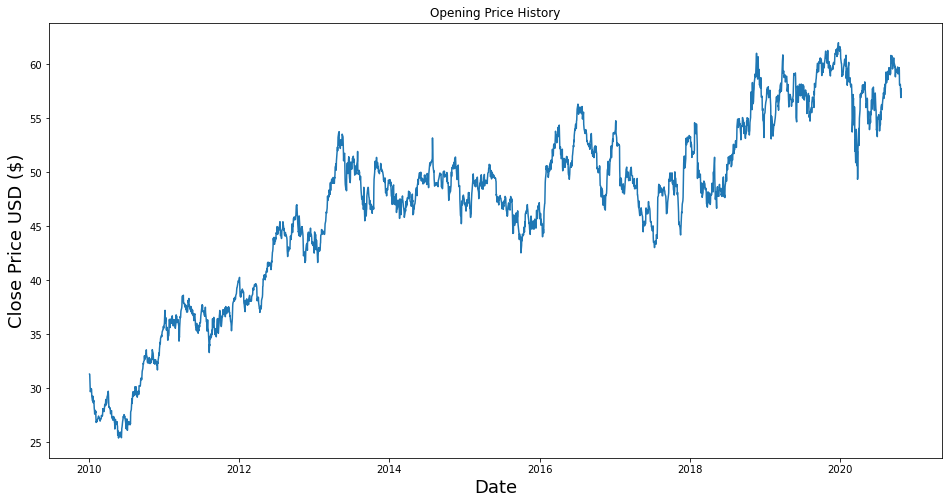

In [5]:
#Visualize the opening price history of Google
plt.figure(figsize=(16,8))
plt.title('Opening Price History')
plt.plot(df['Open'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with the "Open" column
data = df.filter(['Open'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2178

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16168474],
       [0.16091602],
       [0.14221083],
       ...,
       [0.86612974],
       [0.86121204],
       [0.88361482]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_trian data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.16168474, 0.16091602, 0.14221083, 0.1283741 , 0.1170997 ,
       0.12504304, 0.12017454, 0.12453054, 0.12119949, 0.10531286,
       0.09352602, 0.10608158, 0.09480719, 0.08917002, 0.09506346,
       0.08481401, 0.07430834, 0.07020856, 0.06047161, 0.06995233,
       0.06329022, 0.06790244, 0.04842854, 0.03946031, 0.04356004,
       0.04125392, 0.04356004, 0.0453537 , 0.04689115, 0.05432199,
       0.05560315, 0.05252832, 0.04945348, 0.05047843, 0.04689115,
       0.04304759, 0.04304759, 0.04714737, 0.04817232, 0.05022221,
       0.05714055, 0.05457821, 0.05637182, 0.0566281 , 0.06457139,
       0.07430834, 0.06790244, 0.07277095, 0.0668775 , 0.07328339,
       0.07328339, 0.07892062, 0.08507024, 0.08173918, 0.09250107,
       0.0976258 , 0.09173235, 0.08378907, 0.08942624, 0.10300675])]
[0.10556908554198441]



In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2118, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compilb the model
model.compile(optimizer='adam', loss ='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from 
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Opening Price USD (S)',fontsize=18)
plt.plot(valid[['Open','Prediction']])
plt.legend(['Train','Val','Predction'],loc = 'lower right')
plt.show()

In [ ]:
valid

In [ ]:
#Get the qutoe
quote = web.DataReader('VZ', data_source='yahoo',start='2010-01-01',end='2020-10-26')
#Create a new dataframe
new_df = quote.filter(['Open'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert tje X_test data set tp a numpy array
X_test = np.array(X_test)
#Reshape the data
pred_price = model.predict(X_test)
#udo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
#Get the qutoe
quote2 = web.DataReader('VZ', data_source='yahoo',start='2020-10-26',end='2020-10-26')
print(quote2['Open'])